In [2]:
import pandas as pd
import numpy as np
import os
import json
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [3]:
base_path = "../data/stage2/db_data"
directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
directories

['data_0509',
 'data_0509_2',
 'data_0509_3',
 'data_0509_4',
 'data_0509_5',
 'data_0509_6',
 'data_0609',
 'data_0709',
 'data_0709_2',
 'data_0709_4',
 'data_0709_5',
 'data_0709_6',
 'data_0709_7',
 'data_0809',
 'data_0809_1',
 'data_0809_3']

# log file

In [246]:
directory = directories[-1]
log_file = os.path.join(base_path, directory, 'fetch_log_0509_2.txt')
# Path to your log file
# log_file = 'path_to_your_log_file.txt'

# List to store extracted information
data = []
errors = []
# Regular expression to match the relevant line and extract information
regex = r"Prolific ID: ([\w\-]+)"

# Open and read the log file
with open(log_file, 'r') as file:
    for line in file:
        # Find matches in each line
        matches = re.finditer(regex, line, re.MULTILINE)
        
        for matchNum, match in enumerate(matches, start=1):
            document_id = match.group(1)  # Extract the Document ID
            response = match.group(2)  # Extract the saved data
            
            # Convert the response string to a Python dictionary
            try:
                response_dict = json.loads(response.replace("'", '"'))  # Convert single quotes to double for valid JSON
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON for Document ID {document_id}: {e}")
                errors.append(document_id)
                continue
            
            # Append the result to the data list
            data.append({
                'document_id': document_id,
                'response': response
            })

Error decoding JSON for Document ID 66c88f79e46942c099b323a7: Expecting ',' delimiter: line 1 column 537 (char 536)
Error decoding JSON for Document ID 66c88731e46942c099b32391: Expecting ',' delimiter: line 1 column 505 (char 504)
Error decoding JSON for Document ID 66c522869236da2225cc8cf2: Expecting ',' delimiter: line 1 column 346 (char 345)
Error decoding JSON for Document ID 66c7905af837defabd5eb80a: Expecting ',' delimiter: line 1 column 405 (char 404)
Error decoding JSON for Document ID 66c5a45586c57a87db6f59fc: Expecting ',' delimiter: line 1 column 343 (char 342)
Error decoding JSON for Document ID 66c5a9ab86c57a87db6f5a32: Expecting ',' delimiter: line 1 column 531 (char 530)
Error decoding JSON for Document ID 66c5e76c2f44d7b54f76e534: Expecting ',' delimiter: line 1 column 436 (char 435)
Error decoding JSON for Document ID 66c7a655f837defabd5eb872: Expecting ',' delimiter: line 1 column 411 (char 410)
Error decoding JSON for Document ID 66c7d114f837defabd5eb8b6: Expecting 

In [ ]:
prolific_ids = []

# Regex pattern to capture the Prolific ID
regex = r"Prolific ID: ([\w]+)"

# Open and read the log file
with open(log_file, 'r') as file:
    for line in file:
        # Find all matches for Prolific ID in each line
        matches = re.finditer(regex, line, re.MULTILINE)
        
        for match in matches:
            prolific_id = match.group(1)  # Extract the Prolific ID
            prolific_ids.append(prolific_id)  # Append to the list

# Print or return the list of Prolific IDs
print(prolific_ids)

In [253]:
len(set(prolific_ids))

501

# Persuasive text db

In [7]:
directory

'data_0809'

In [3]:
directory = directories[-1]
file_path = os.path.join(base_path, directory, 'persuasive_texts.json')
all_data = []
    # Check if the file exists
if os.path.exists(file_path):
    # Open and read the json file
    with open(file_path, 'r') as file:
        for line in file:
            # Parse each line as JSON and append to the list
            all_data.append(json.loads(line))

# Convert the list of JSON objects into a DataFrame
df_per_texts = pd.DataFrame(all_data)
df_per_texts.head(2)

,_id,task_id,content,task_category,view_count
0,66c5a13c86c57a87db6f59d9,ENG,Join hands with us in protecting our planet's ...,ENG,5
1,66c5e4be2f44d7b54f76e52d,ENG,In a time of uncertainty for the future of our...,ENG,5


In [4]:
df_per_texts['view_count'].value_counts()

view_count
5    128
4      1
Name: count, dtype: int64

In [5]:
df_per_texts[['_id','view_count']]

,_id,view_count
0,66c5a13c86c57a87db6f59d9,5
1,66c5e4be2f44d7b54f76e52d,5
2,66c5a21086c57a87db6f59e1,5
3,66c88773e46942c099b32393,5
4,66c5a3e386c57a87db6f59f9,5
...,...,...
124,d1dce0f4179c433fb521b0d9_LLM,5
125,95334737950147229a304e3d_LLM,5
126,66341865cc824405b264f493_LLM,4
127,e28ebe40ff3b4761aa28ef67_LLM,5


In [ ]:
df.groupby(['view_count','task_category'])['_id'].value_counts().reset_index().to_csv('./current_state.csv',index=False)

In [ ]:
grouped_data = df.groupby('task_category')
grouped_data['view_count'].value_counts()

# survey response

In [1]:
directories[-1]

NameError: name 'directories' is not defined

In [4]:
directory = directories[-1]
file_path = os.path.join(base_path, directory, 'donation_survey.json')
all_data = []
    # Check if the file exists
if os.path.exists(file_path):
    # Open and read the json file
    with open(file_path, 'r') as file:
        for line in file:
            # Parse each line as JSON and append to the list
            all_data.append(json.loads(line))

# Convert the list of JSON objects into a DataFrame
df = pd.DataFrame(all_data)
df.head(2)

,_id,prolific_id,document_id,responses,timestamp
0,{'$oid': '66d8aafa6dbc93392c1cda79'},607778a26ff3de83125f50c5,66c5a13c86c57a87db6f59d9,"{'donationAmount': '0', 'emotionalAppeal': {'E...",{'$date': '2024-09-04T18:46:18.789Z'}
1,{'$oid': '66d8b2dc6dbc93392c1cda7a'},66a52bb0e95dee7a728e1892,66c62a7e07bfd712ba6185d5,"{'donationAmount': '1', 'emotionalAppeal': {'E...",{'$date': '2024-09-04T19:19:56.727Z'}


In [5]:
documents = pd.read_csv('../data/buckets_combined/master_docs_with_basic_formatting_0109.csv')
documents.head(2)

,_id,task_id,content,task_category,view_count
0,66c5a13c86c57a87db6f59d9,ENG,Join hands with us in protecting our planet's ...,ENG,0
1,66c5e4be2f44d7b54f76e52d,ENG,In a time of uncertainty for the future of our...,ENG,0


## word count

In [8]:
documents['word_count'] = documents['content'].apply(lambda x: len(str(x).split()))


In [9]:
documents.groupby('task_id')['word_count'].mean().reset_index()


,task_id,word_count
0,CONTROL_ENG,167.0000
1,ENG,195.5625
2,ENG_1,243.4375
3,ENG_2,183.1250
4,ENG_LLM,198.4375
5,ENG_No_LLM,127.9375
6,ESP_1,159.0625
7,ESP_2,194.0625
8,ESP_LLM,180.1250


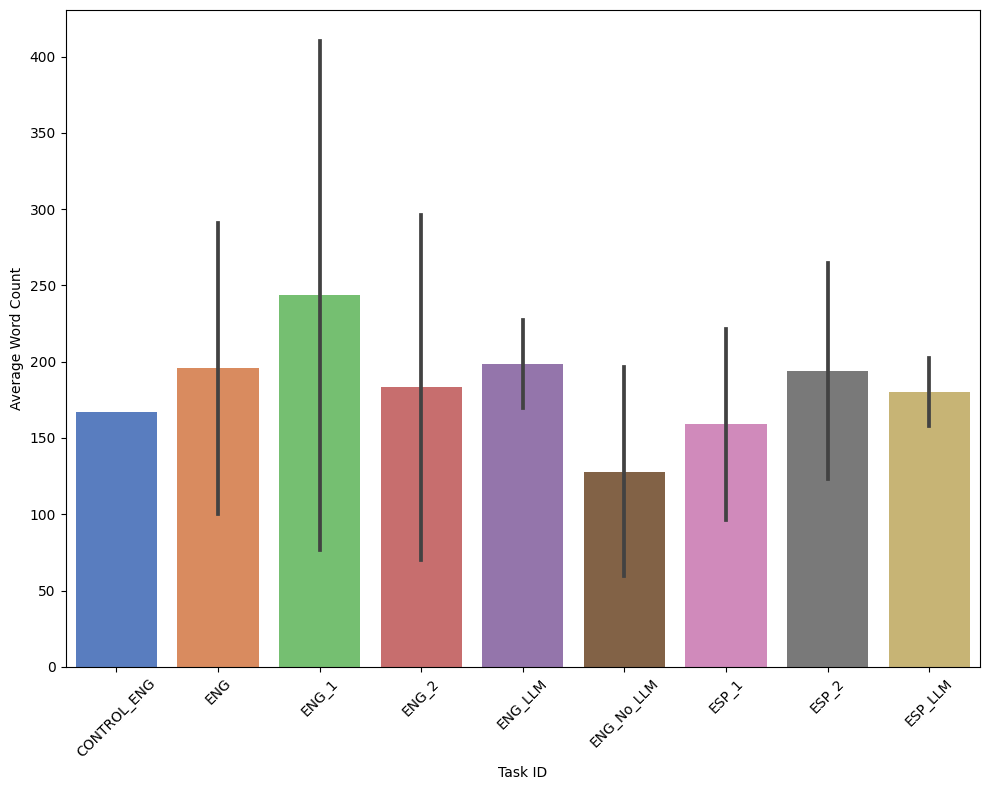

In [156]:
plt.figure(figsize=(10, 8))
sns.barplot(data=documents.sort_values(by='task_id'), x='task_id', y='word_count', errorbar="sd", palette='muted')
# plt.title('Average Word Count by TASK_ID')
plt.ylabel('Average Word Count')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../figures/results/stage1_word_count.pdf')
plt.show()

In [54]:
human_written_task_list = ['ENG','ENG_1', 'ENG_2', 'ESP_1','ESP_2', 'ENG_No_LLM']

In [56]:
documents[documents['task_id'].isin(human_written_task_list)]['word_count'].describe()

count     96.000000
mean     183.864583
std      106.017935
min       71.000000
25%      109.250000
50%      152.500000
75%      223.750000
max      740.000000
Name: word_count, dtype: float64

In [55]:
documents[documents['task_id'].isin(human_written_task_list)].shape

(96, 6)

In [166]:
grouped_df = documents.groupby('task_id').agg(
    mean_word_count=('word_count', 'mean'),
    std_word_count=('word_count', 'std')
).reset_index()

grouped_df

,task_id,mean_word_count,std_word_count
0,CONTROL_ENG,167.0000,NaN
1,ENG,195.5625,95.082398
2,ENG_1,243.4375,166.548079
3,ENG_2,183.1250,112.981931
4,ENG_LLM,198.4375,29.118079
5,ENG_No_LLM,127.9375,68.396363
6,ESP_1,159.0625,62.557141
7,ESP_2,194.0625,70.813811
8,ESP_LLM,180.1250,21.993560


In [160]:
pal = sns.color_palette('muted')
hex_pal = pal.as_hex()


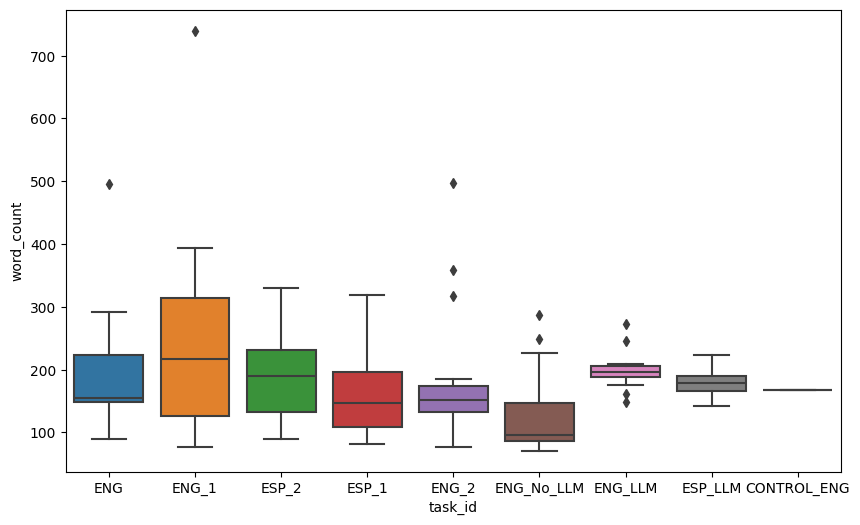

In [151]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=documents, x='task_id', y='word_count')
plt.show()

# processing donation survey responses

In [10]:
df = df.merge(documents[['_id','task_id','content','task_category']], left_on='document_id', right_on='_id').reset_index()

In [13]:
df.head()

,index,_id_x,prolific_id,document_id,responses,timestamp,_id_y,task_id,content,task_category
0,0,{'$oid': '66d8aafa6dbc93392c1cda79'},607778a26ff3de83125f50c5,66c5a13c86c57a87db6f59d9,"{'donationAmount': '0', 'emotionalAppeal': {'E...",{'$date': '2024-09-04T18:46:18.789Z'},66c5a13c86c57a87db6f59d9,ENG,Join hands with us in protecting our planet's ...,ENG
1,1,{'$oid': '66d8e2db72ea26746f2130ca'},548491acfdf99b0379939cc0,66c5a13c86c57a87db6f59d9,"{'donationAmount': '0', 'emotionalAppeal': {'E...",{'$date': '2024-09-04T22:44:43.452Z'},66c5a13c86c57a87db6f59d9,ENG,Join hands with us in protecting our planet's ...,ENG
2,2,{'$oid': '66d8e3c572ea26746f2130fb'},62d38f10654f3fc8a393b551,66c5a13c86c57a87db6f59d9,"{'donationAmount': '0', 'emotionalAppeal': {'E...",{'$date': '2024-09-04T22:48:37.138Z'},66c5a13c86c57a87db6f59d9,ENG,Join hands with us in protecting our planet's ...,ENG
3,3,{'$oid': '66d8e9ba72ea26746f21316a'},5e120ac3ac9e168a3f6ded71,66c5a13c86c57a87db6f59d9,"{'donationAmount': '1', 'emotionalAppeal': {'E...",{'$date': '2024-09-04T23:14:02.375Z'},66c5a13c86c57a87db6f59d9,ENG,Join hands with us in protecting our planet's ...,ENG
4,4,{'$oid': '66d98a9872ea26746f21321f'},65da7c7c8f8bac48599b274a,66c5a13c86c57a87db6f59d9,"{'donationAmount': '1.5', 'emotionalAppeal': {...",{'$date': '2024-09-05T10:40:24.928Z'},66c5a13c86c57a87db6f59d9,ENG,Join hands with us in protecting our planet's ...,ENG


In [38]:
df.shape

(809, 10)

In [11]:
df[df[['prolific_id','document_id']].duplicated()]['task_id'].value_counts()

task_id
ENG_No_LLM     9
ESP_LLM        5
CONTROL_ENG    4
ENG_1          2
ENG            2
ENG_LLM        2
ESP_1          1
ENG_2          1
Name: count, dtype: int64

In [12]:
df = df.drop_duplicates(subset=['prolific_id','document_id'])
df = df.drop_duplicates(subset=['prolific_id'])

In [37]:
df[df['document_id']=='66c9f049925382be577189c8']

,index,_id_x,prolific_id,document_id,responses,timestamp,_id_y,task_id,content,task_category
517,517,{'$oid': '66d8e29b72ea26746f2130b7'},6658eac7e945182d30fa04d2,66c9f049925382be577189c8,"{'donationAmount': '1.00', 'emotionalAppeal': ...",{'$date': '2024-09-04T22:43:39.531Z'},66c9f049925382be577189c8,ENG_No_LLM,At the WWF we care deeply about the planet and...,ENG
521,521,{'$oid': '66d8e33c72ea26746f2130e1'},63ef5d25e9b2814388fe79d4,66c9f049925382be577189c8,"{'donationAmount': '0', 'emotionalAppeal': {'E...",{'$date': '2024-09-04T22:46:20.642Z'},66c9f049925382be577189c8,ENG_No_LLM,At the WWF we care deeply about the planet and...,ENG
522,522,{'$oid': '66d8e90672ea26746f213160'},6672f62271d76001fb79f37c,66c9f049925382be577189c8,"{'donationAmount': '1.5', 'emotionalAppeal': {...",{'$date': '2024-09-04T23:11:02.444Z'},66c9f049925382be577189c8,ENG_No_LLM,At the WWF we care deeply about the planet and...,ENG
523,523,{'$oid': '66d9889372ea26746f213212'},668cbad24e74402459631c48,66c9f049925382be577189c8,"{'donationAmount': '1.5', 'emotionalAppeal': {...",{'$date': '2024-09-05T10:31:47.668Z'},66c9f049925382be577189c8,ENG_No_LLM,At the WWF we care deeply about the planet and...,ENG
524,524,{'$oid': '66d99df272ea26746f213261'},665a66d17224187f00fca42c,66c9f049925382be577189c8,"{'donationAmount': '1.5', 'emotionalAppeal': {...",{'$date': '2024-09-05T12:02:58.143Z'},66c9f049925382be577189c8,ENG_No_LLM,At the WWF we care deeply about the planet and...,ENG
525,525,{'$oid': '66da155e11018197b76fdb4b'},5d951ede9b6f880018f63b6e,66c9f049925382be577189c8,"{'donationAmount': '0', 'emotionalAppeal': {'E...",{'$date': '2024-09-05T20:32:30.982Z'},66c9f049925382be577189c8,ENG_No_LLM,At the WWF we care deeply about the planet and...,ENG


In [13]:
df['task_category'].value_counts()

task_category
ENG    509
ESP    258
Name: count, dtype: int64

In [14]:
df = df[df['prolific_id']!='65e6fb8c62b34b6ef5249890']

In [15]:
df['task_id'].value_counts()

task_id
ESP_2          91
ENG            86
ENG_1          86
ESP_1          85
ENG_No_LLM     85
ENG_2          84
ENG_LLM        84
CONTROL_ENG    83
ESP_LLM        82
Name: count, dtype: int64

In [16]:
df[df['task_id']=='ENG']['document_id'].value_counts()

document_id
66c5a3e386c57a87db6f59f9    7
66c522869236da2225cc8cf2    6
66c5a9ab86c57a87db6f5a32    6
66c5e4be2f44d7b54f76e52d    6
66c5a21086c57a87db6f59e1    6
66c5a13c86c57a87db6f59d9    5
66c88773e46942c099b32393    5
66c5a85186c57a87db6f5a21    5
66c524a69236da2225cc8cfd    5
66c88f79e46942c099b323a7    5
66c88731e46942c099b32391    5
66c88d0be46942c099b323a0    5
66c5a45586c57a87db6f59fc    5
66c5241b9236da2225cc8cfa    5
66c5e76c2f44d7b54f76e534    5
66c5a42286c57a87db6f59fa    5
Name: count, dtype: int64

In [19]:
df[df['document_id']=='66c5e4be2f44d7b54f76e52d']

,index,_id_x,prolific_id,document_id,responses,timestamp,_id_y,task_id,content,task_category
375,375,{'$oid': '66d8e1e672ea26746f213097'},66706191120230e6a89ddd0e,66c5e4be2f44d7b54f76e52d,"{'donationAmount': '1', 'emotionalAppeal': {'E...",{'$date': '2024-09-04T22:40:38.561Z'},66c5e4be2f44d7b54f76e52d,ENG,In a time of uncertainty for the future of our...,ENG
377,377,{'$oid': '66d8ec2472ea26746f2131a6'},64485d7e807fdd8adea9db1d,66c5e4be2f44d7b54f76e52d,"{'donationAmount': '1', 'emotionalAppeal': {'E...",{'$date': '2024-09-04T23:24:20.196Z'},66c5e4be2f44d7b54f76e52d,ENG,In a time of uncertainty for the future of our...,ENG
379,379,{'$oid': '66d98ae172ea26746f213223'},5edc27d98d52358eb8cb2e0f,66c5e4be2f44d7b54f76e52d,"{'donationAmount': '.7', 'emotionalAppeal': {'...",{'$date': '2024-09-05T10:41:37.34Z'},66c5e4be2f44d7b54f76e52d,ENG,In a time of uncertainty for the future of our...,ENG
380,380,{'$oid': '66d9c75872ea26746f21328a'},663fd4658572150cc2416c27,66c5e4be2f44d7b54f76e52d,"{'donationAmount': '1.5', 'emotionalAppeal': {...",{'$date': '2024-09-05T14:59:36.394Z'},66c5e4be2f44d7b54f76e52d,ENG,In a time of uncertainty for the future of our...,ENG
381,381,{'$oid': '66d9c76d72ea26746f21328d'},60a2a8570a0f9cc00d6b9d1a,66c5e4be2f44d7b54f76e52d,"{'donationAmount': '1.5', 'emotionalAppeal': {...",{'$date': '2024-09-05T14:59:57.345Z'},66c5e4be2f44d7b54f76e52d,ENG,In a time of uncertainty for the future of our...,ENG
382,382,{'$oid': '66dc784c3c02e40205e03300'},573348527d01ed000f8f1615,66c5e4be2f44d7b54f76e52d,"{'donationAmount': '0', 'emotionalAppeal': {'E...",{'$date': '2024-09-07T15:59:08.606Z'},66c5e4be2f44d7b54f76e52d,ENG,In a time of uncertainty for the future of our...,ENG


In [357]:
df.iloc[0]['responses']

{'donationAmount': '0',
 'emotionalAppeal': {'EA1': 'Strongly Disagree',
  'EA2': 'Strongly Disagree',
  'EA3': 'Strongly Disagree'},
 'informationAwareness': {'IA1': 'Agree', 'IA2': 'Neutral', 'IA3': 'Neutral'},
 'behavioralIntentions': {'BI1': 'Disagree', 'BI2': 'Disagree'},
 'attentionCheck': 'WWF',
 'charityFeedbackPositive': 'NA',
 'charityFeedbackNegative': 'NA',
 'adSource': 'AS1',
 'adSourceReason': 'It seems generic.',
 'recipeUsed': ['RU2']}

In [25]:
df.iloc[-1]['responses']

{'donationAmount': '0',
 'emotionalAppeal': {'EA1': 'De acuerdo',
  'EA2': 'Totalmente de acuerdo',
  'EA3': 'De acuerdo'},
 'informationAwareness': {'IA1': 'De acuerdo',
  'IA2': 'De acuerdo',
  'IA3': 'De acuerdo'},
 'behavioralIntentions': {'BI1': 'De acuerdo', 'BI2': 'Neutral'},
 'charity': 'WWF',
 'charityFeedbackPositive': 'Abre Los Los Joana la situacion del WWF',
 'charityFeedbackNegative': 'N/a',
 'adSource': 'AS1',
 'adSourceReason': 'Se siente como si fuera hecho en AI porque le dieron la informacion y el AI pudo ser la informacion.',
 'recipeUsed': ['RU1', 'RU4']}

In [221]:
df['document_id'].value_counts().reset_index()

,document_id,count
0,4ff91bcf8009404cb25834c5_CONTROL,81
1,66c7913df837defabd5eb80f,13
2,66c78f7df837defabd5eb804,10
3,66c711cc6db9c208f260cb2a,6
4,66d3c85f5a434c9ed85a684b,6
...,...,...
124,66c688dd6db9c208f260ca47,4
125,07a095dffb5c452096cb8d02_LLM,4
126,df20c7f011d74e078acf19fe_LLM,4
127,66d2ccdb3ef557a33f96df8e,4


In [17]:
scale_mapping = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5,
    "Totalmente en desacuerdo": 1,
    "En desacuerdo": 2,
    "Neutral": 3,
    "De acuerdo": 4,
    "Totalmente de acuerdo": 5
}

categories = {
    "emotionalAppeal": ["EA1", "EA2", "EA3"],
    "informationAwareness": ["IA1", "IA2", "IA3"],
    "behavioralIntentions": ["BI1", "BI2"],
}

In [18]:
rows = []

# Process each survey
for _, row in df.iterrows():
    survey = row['responses']
    row_data = {}

    # Extract basic information from the original DataFrame
    row_data['PROLIFIC_PID'] = row['prolific_id']
    row_data['document_id'] = row['document_id']
    row_data['task_id'] = row['task_id']
    row_data['task_category'] = row['task_category']
    row_data['timestamp'] = row['timestamp']
    row_data['donation_data'] = survey.get('donationAmount',0)
    
    if 'attentionCheck' in survey:
        row_data['attentionCheck'] = survey.get('attentionCheck','NA')
    elif 'charity' in survey:
        row_data['attentionCheck'] = survey.get('charity','NA')
    
    row_data['charityFeedbackPositive'] = survey.get('charityFeedbackPositive','NA')
    row_data['charityFeedbackNegative'] = survey.get('charityFeedbackNegative','NA')
    
    row_data['adSource'] = survey.get('adSource','NA')
    row_data['adSourceReason'] = survey.get('adSourceReason','NA')
    
    row_data['recipeUsed'] = survey.get('recipeUsed', [])
    
    
    # Extract and map ownership responses
    emotionalAppeal = survey.get('emotionalAppeal', {})
    for i, key in enumerate(categories['emotionalAppeal']):
        row_data[key] = scale_mapping.get(emotionalAppeal.get(list(emotionalAppeal.keys())[i], 'NA'), 'NA')
        
    informationAwareness = survey.get('informationAwareness', {})
    for i, key in enumerate(categories['informationAwareness']):
        row_data[key] = scale_mapping.get(informationAwareness.get(list(informationAwareness.keys())[i], 'NA'), 'NA')

    behavioralIntentions = survey.get('behavioralIntentions', {})
    for i, key in enumerate(categories['behavioralIntentions']):
        row_data[key] = scale_mapping.get(behavioralIntentions.get(list(behavioralIntentions.keys())[i], 'NA'), 'NA')

    
    # if row['TASK_ID'] != "ENG_No_LLM":
    #     # Map collaboration responses
    #     collaboration = survey.get('collaboration', {})
    #     for i, key in enumerate(categories['emotionalAppeal']):
    #         row_data[key] = scale_mapping.get(collaboration.get(list(collaboration.keys())[i], 'NA'), 'NA')

    #     # Map LLM Prowess responses
    #     aiCapabilities = survey.get('aiCapabilities', {})
    #     for i, key in enumerate(categories['LLM Prowess']):
    #         row_data[key] = scale_mapping.get(aiCapabilities.get(list(aiCapabilities.keys())[i], 'NA'), 'NA')

    #     # Extract and map feature responses (keeping these as they are without scaling)
    #     usefulness = survey.get('usefulness', {})
    #     for feat_key, feat_name in feature_mapping.items():
    #         row_data[feat_key] = usefulness.get(feat_name, 'NA')
    # else:
    #     # If TASK_ID is ENG_No_LLM, set collaboration, LLM Prowess, and feature responses to 'NA'
    #     for key in categories['Benefits of Co-writing']:
    #         row_data[key] = 'NA'

    #     for key in categories['LLM Prowess']:
    #         row_data[key] = 'NA'

    #     for feat_key in feature_mapping.keys():
    #         row_data[feat_key] = 'NA'

    # Append the row_data to the rows list
    rows.append(row_data)

# Create DataFrame with the required columns


In [19]:
final_survey_df = pd.DataFrame(rows, columns=list(row_data.keys()))
final_survey_df[final_survey_df['attentionCheck']!='WWF']['document_id'].count()

38

In [20]:
final_survey_df = final_survey_df[final_survey_df['attentionCheck']=='WWF']

In [21]:
final_survey_df.head(1)

,PROLIFIC_PID,document_id,task_id,task_category,timestamp,donation_data,attentionCheck,charityFeedbackPositive,charityFeedbackNegative,adSource,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
0,607778a26ff3de83125f50c5,66c5a13c86c57a87db6f59d9,ENG,ENG,{'$date': '2024-09-04T18:46:18.789Z'},0,WWF,NA,NA,AS1,It seems generic.,[RU2],1,1,1,4,3,3,2,2


In [22]:
final_survey_df.shape

(728, 20)

In [23]:
final_survey_df['task_id'].value_counts()

task_id
ENG_2          82
CONTROL_ENG    82
ENG            81
ENG_1          81
ESP_1          81
ENG_LLM        81
ESP_2          80
ENG_No_LLM     80
ESP_LLM        80
Name: count, dtype: int64

In [ ]:
document_counts = final_survey_df['document_id'].value_counts().reset_index()
document_counts.columns = ['document_id', 'count']
documents_less_than_5 = document_counts[document_counts['count'] < 5]
documents_less_than_5

In [ ]:
documents_less_than_5

In [228]:
final_survey_df['document_id'].value_counts().reset_index()

,document_id,count
0,4ff91bcf8009404cb25834c5_CONTROL,80
1,66c7a655f837defabd5eb872,6
2,a80a6df6008e436980ff36ad_LLM,6
3,66c75a3c6db9c208f260cc38,6
4,66c522869236da2225cc8cf2,6
...,...,...
124,66c730526db9c208f260cba4,4
125,df20c7f011d74e078acf19fe_LLM,4
126,196cc25b18bd4895b0c5feaf_LLM,4
127,66d2ccdb3ef557a33f96df8e,4


In [426]:
t = final_survey_df[final_survey_df['document_id']=='a80a6df6008e436980ff36ad_LLM']

In [427]:
t['timestamp'] = pd.to_datetime(t['timestamp'].apply(lambda x: x['$date']))

C:\Users\shrey\AppData\Local\Temp\ipykernel_3164\3792511261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['timestamp'] = pd.to_datetime(t['timestamp'].apply(lambda x: x['$date']))


In [428]:
t_sorted = t.sort_values(by='timestamp')
t_sorted

,PROLIFIC_PID,document_id,task_id,task_category,timestamp,donation_data,attentionCheck,charityFeedbackPositive,charityFeedbackNegative,adSource,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
463,623488cb1417a113ca966af3,a80a6df6008e436980ff36ad_LLM,ENG_LLM,ENG,2024-09-04 22:45:38.549000+00:00,.50,WWF,I've always been an animal and nature lover an...,I didn't like how they played the blame game a...,AS1,It seems like just a robotic kind of generic a...,[RU6],4,4,5,2,3,3,3,4
464,66af3f96e50600f8f0da239a,a80a6df6008e436980ff36ad_LLM,ENG_LLM,ENG,2024-09-04 22:55:15.230000+00:00,1.5,WWF,the fact the they put all this energy and effort,n\a,AS2,the way they explained it seemed flawless and ...,[RU7],3,3,3,4,4,4,3,3
465,66465a9ce1c681c9cbb78eca,a80a6df6008e436980ff36ad_LLM,ENG_LLM,ENG,2024-09-04 23:12:45.711000+00:00,0,WWF,"I think it was well written, although i do hav...",NA,AS1,I can not give a exact reason as its Moreso ju...,[RU7],3,4,4,4,4,4,3,3
466,56fb454534a0d300061a5070,a80a6df6008e436980ff36ad_LLM,ENG_LLM,ENG,2024-09-05 10:40:05.616000+00:00,1.3,WWF,"I liked that it played on your emotions, and a...",I didn't like that it left out specifics. I l...,AS1,"Well, what isn't these days? To be honest, ...",[RU6],4,4,4,2,2,4,2,4
467,5c0f500787e876000151fc5f,a80a6df6008e436980ff36ad_LLM,ENG_LLM,ENG,2024-09-05 12:34:28.973000+00:00,0.5,WWF,The important part of the ad is explaining wha...,"The message is too vague, it doesn't specify e...",AS1,Every research study nowadays is about AI. Add...,[RU6],3,4,3,3,3,3,2,4
468,5c1053202b16ba0001c86317,a80a6df6008e436980ff36ad_LLM,ENG_LLM,ENG,2024-09-05 15:10:52.171000+00:00,0,WWF,NA,The formatting is not done well at all,AS1,The way it's structured looks robotic,[RU7],2,2,2,3,3,3,2,2


In [24]:
final_survey_df = final_survey_df[final_survey_df['PROLIFIC_PID']!='5c1053202b16ba0001c86317']

In [25]:
final_survey_df['task_id'].value_counts()

task_id
ENG_2          82
CONTROL_ENG    82
ENG            81
ENG_1          81
ESP_1          81
ESP_2          80
ENG_No_LLM     80
ENG_LLM        80
ESP_LLM        80
Name: count, dtype: int64

In [26]:
final_survey_df.to_csv('../output/final_collected_survey.csv',index=False)

In [48]:
final_survey_df[final_survey_df['task_id']=='ESP_LLM']['document_id'].value_counts()

document_id
9b92f206112e461297fd9e27_LLM    5
3baaaf3975244733aa945599_LLM    5
196cc25b18bd4895b0c5feaf_LLM    5
df20c7f011d74e078acf19fe_LLM    5
99436a16f095428a85082a49_LLM    5
87f201a2dd0241f694ca45ec_LLM    5
20b0820f861f4bf9a1713806_LLM    5
07a095dffb5c452096cb8d02_LLM    5
a82211f9371247b99bdf21d3_LLM    5
16bf296073ba4eee9f49b9f3_LLM    5
d1dce0f4179c433fb521b0d9_LLM    5
66341865cc824405b264f493_LLM    5
f6dff6c44ed44a2a9127c14b_LLM    5
e28ebe40ff3b4761aa28ef67_LLM    5
95334737950147229a304e3d_LLM    5
ede48512dcbc4a55bfc99a27_LLM    4
Name: count, dtype: int64

In [ ]:
df_counts = df['document_id'].value_counts().reset_index()
df_counts.columns = ['document_id', 'count']  # Rename columns for clarity

# 2. Merge with df_per_texts on document_id/_id to align the two dataframes
merged_df = pd.merge(df_counts, df_per_texts, left_on='document_id', right_on='_id', how='outer', indicator=True)

# 3. Filter to find the rows that are extra in df_per_texts (i.e., those in df_per_texts but not in df_counts)
extra_in_df_per_texts = merged_df[merged_df['_merge'] == 'right_only']

# 4. Optionally, you can filter out the columns '_merge' and '_id' if you only want to see the extra entries
extra_in_df_per_texts = extra_in_df_per_texts[['document_id', 'view_count']]

In [ ]:
merged_df['count'].fillna(0, inplace=True)
merged_df['view_count'].fillna(0, inplace=True)

# 4. Calculate the difference between the counts in df and view_count in df_per_texts
merged_df['difference'] = merged_df['count'] - merged_df['view_count']

# 5. Optionally, filter for rows where there's a difference
mismatch_df = merged_df[merged_df['difference'] != 0]

In [ ]:
mismatch_df[['_id','difference']].to_csv('../output/mismatch_0509.csv',index=False)

In [91]:
inserted_docs = pd.read_csv('../data/buckets_combined/master_docs_with_basic_formatting_0109.csv')

In [92]:
inserted_docs

,_id,task_id,content,task_category,view_count
0,66c5a13c86c57a87db6f59d9,ENG,Join hands with us in protecting our planet's ...,ENG,0
1,66c5e4be2f44d7b54f76e52d,ENG,In a time of uncertainty for the future of our...,ENG,0
2,66c5a21086c57a87db6f59e1,ENG,We are at a critical juncture where our inacti...,ENG,0
3,66c88773e46942c099b32393,ENG,As you consider donating to the World Wildlife...,ENG,0
4,66c5a3e386c57a87db6f59f9,ENG,\n\nThe World Wildlife Fund (WWF) is a beacon ...,ENG,0
...,...,...,...,...,...
124,d1dce0f4179c433fb521b0d9_LLM,ESP_LLM,**Únete a la lucha por el futuro de nuestro pl...,ESP,0
125,95334737950147229a304e3d_LLM,ESP_LLM,**¡Sólo tú puedes hacer la diferencia para el ...,ESP,0
126,66341865cc824405b264f493_LLM,ESP_LLM,**¡Un Mundo en Armonía con la Naturaleza!** ¿Q...,ESP,0
127,e28ebe40ff3b4761aa28ef67_LLM,ESP_LLM,**Unamos Nuestros Esfuerzos para Proteger el P...,ESP,0


In [93]:
valid_data = final_survey_df['document_id'].value_counts().reset_index()
valid_data.rename(columns={'document_id':'_id'}, inplace=True)

In [94]:
valid_data

,_id,count
0,4ff91bcf8009404cb25834c5_CONTROL,80
1,66c5a13c86c57a87db6f59d9,5
2,be6355efa3ef4167a73562ca_LLM,5
3,66c9f049925382be577189c8,5
4,733d40564e8b430788c51266_LLM,5
...,...,...
124,66c7d52df837defabd5eb8bb,4
125,df20c7f011d74e078acf19fe_LLM,4
126,66c730526db9c208f260cba4,4
127,66c7ac99f837defabd5eb891,4


In [95]:
inserted_docs = inserted_docs.merge(valid_data[['_id','count']], on='_id', how='inner').reset_index(drop=True)

In [96]:
inserted_docs

,_id,task_id,content,task_category,view_count,count
0,66c5a13c86c57a87db6f59d9,ENG,Join hands with us in protecting our planet's ...,ENG,0,5
1,66c5e4be2f44d7b54f76e52d,ENG,In a time of uncertainty for the future of our...,ENG,0,5
2,66c5a21086c57a87db6f59e1,ENG,We are at a critical juncture where our inacti...,ENG,0,5
3,66c88773e46942c099b32393,ENG,As you consider donating to the World Wildlife...,ENG,0,5
4,66c5a3e386c57a87db6f59f9,ENG,\n\nThe World Wildlife Fund (WWF) is a beacon ...,ENG,0,5
...,...,...,...,...,...,...
124,d1dce0f4179c433fb521b0d9_LLM,ESP_LLM,**Únete a la lucha por el futuro de nuestro pl...,ESP,0,5
125,95334737950147229a304e3d_LLM,ESP_LLM,**¡Sólo tú puedes hacer la diferencia para el ...,ESP,0,5
126,66341865cc824405b264f493_LLM,ESP_LLM,**¡Un Mundo en Armonía con la Naturaleza!** ¿Q...,ESP,0,4
127,e28ebe40ff3b4761aa28ef67_LLM,ESP_LLM,**Unamos Nuestros Esfuerzos para Proteger el P...,ESP,0,5


In [97]:
inserted_docs['view_count'] = inserted_docs['count']
inserted_docs

,_id,task_id,content,task_category,view_count,count
0,66c5a13c86c57a87db6f59d9,ENG,Join hands with us in protecting our planet's ...,ENG,5,5
1,66c5e4be2f44d7b54f76e52d,ENG,In a time of uncertainty for the future of our...,ENG,5,5
2,66c5a21086c57a87db6f59e1,ENG,We are at a critical juncture where our inacti...,ENG,5,5
3,66c88773e46942c099b32393,ENG,As you consider donating to the World Wildlife...,ENG,5,5
4,66c5a3e386c57a87db6f59f9,ENG,\n\nThe World Wildlife Fund (WWF) is a beacon ...,ENG,5,5
...,...,...,...,...,...,...
124,d1dce0f4179c433fb521b0d9_LLM,ESP_LLM,**Únete a la lucha por el futuro de nuestro pl...,ESP,5,5
125,95334737950147229a304e3d_LLM,ESP_LLM,**¡Sólo tú puedes hacer la diferencia para el ...,ESP,5,5
126,66341865cc824405b264f493_LLM,ESP_LLM,**¡Un Mundo en Armonía con la Naturaleza!** ¿Q...,ESP,4,4
127,e28ebe40ff3b4761aa28ef67_LLM,ESP_LLM,**Unamos Nuestros Esfuerzos para Proteger el P...,ESP,5,5


In [98]:
inserted_docs[['task_id','view_count']].value_counts()

task_id      view_count
ENG          5             16
ENG_1        5             16
ENG_2        5             16
ENG_LLM      5             16
ENG_No_LLM   5             16
ESP_1        5             13
ESP_LLM      5             12
ESP_2        5             10
             4              6
ESP_1        4              3
ESP_LLM      4              3
CONTROL_ENG  80             1
ESP_LLM      3              1
Name: count, dtype: int64

In [99]:
inserted_docs.drop(columns='count', inplace=True)

In [100]:
inserted_docs['task_id'].value_counts()

task_id
ENG            16
ENG_1          16
ESP_2          16
ESP_1          16
ENG_2          16
ENG_No_LLM     16
ENG_LLM        16
ESP_LLM        16
CONTROL_ENG     1
Name: count, dtype: int64

In [101]:
inserted_docs[inserted_docs['task_id']=='CONTROL_ENG']

,_id,task_id,content,task_category,view_count
128,4ff91bcf8009404cb25834c5_CONTROL,CONTROL_ENG,The mission of World Wildlife Fund is to conse...,ENG,80


In [478]:
inserted_docs.loc[inserted_docs['task_id'] == 'CONTROL_ENG', 'view_count'] = 1


In [479]:
inserted_docs[inserted_docs['task_id']=='CONTROL_ENG']

,_id,task_id,content,task_category,view_count
128,4ff91bcf8009404cb25834c5_CONTROL,CONTROL_ENG,The mission of World Wildlife Fund is to conse...,ENG,1


In [102]:
inserted_docs[['task_id','view_count']].value_counts()

task_id      view_count
ENG          5             16
ENG_1        5             16
ENG_2        5             16
ENG_LLM      5             16
ENG_No_LLM   5             16
ESP_1        5             13
ESP_LLM      5             12
ESP_2        5             10
             4              6
ESP_1        4              3
ESP_LLM      4              3
CONTROL_ENG  80             1
ESP_LLM      3              1
Name: count, dtype: int64

In [103]:
inserted_docs.to_csv('../data/buckets_combined/last_few_points_3.csv', index=False)

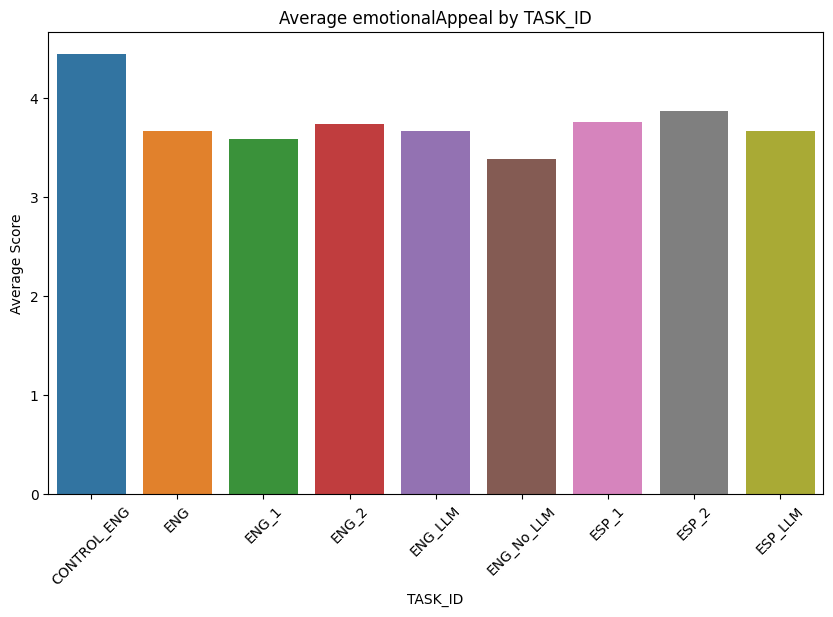

In [97]:
# Calculate the mean score for each category in 'Ownership' by TASK_ID
emotionalAppeal_cols = categories['emotionalAppeal']

# Group by 'TASK_ID' and calculate the mean of the ownership columns
grouped_df_cat = final_survey_df[emotionalAppeal_cols + ['task_id']].groupby('task_id').mean().reset_index()

# Plot the results for the 'Ownership' category


# Calculate the mean score for the 'Ownership' category by TASK_ID
category_mean = grouped_df_cat[emotionalAppeal_cols].mean(axis=1)


plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df_cat['task_id'], y=category_mean, errorbar=None)
plt.title('Average emotionalAppeal by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()


In [63]:
categories

{'emotionalAppeal': ['EA1', 'EA2', 'EA3'],
 'informationAwareness': ['IA1', 'IA2', 'IA3'],
 'behavioralIntentions': ['BI1', 'BI2']}

In [30]:
final_survey_df.to_csv('../output/donation_task_data_07_09_3.csv',index=False)

In [145]:
final_survey_df[['task_id'] + emotionalAppeal_cols + informationAwareness_cols + behavioralIntentions_cols + ['donation_data'] ].to_csv('test.csv',index=False)

In [146]:
final_survey_df[['task_id'] + emotionalAppeal_cols + informationAwareness_cols + behavioralIntentions_cols + ['donation_data'] ]

,task_id,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2,donation_data
0,ENG,1,1,1,4,3,3,2,2,0.0
1,ENG,4,5,4,4,5,5,4,3,0.0
2,ENG,3,3,3,4,4,4,1,1,0.0
3,ENG,4,4,4,4,4,4,4,3,1.0
4,ESP_2,4,4,4,4,4,3,3,4,1.0
...,...,...,...,...,...,...,...,...,...,...
421,ESP_1,4,4,4,4,4,4,5,4,0.5
422,ESP_1,2,3,2,4,2,2,2,2,0.0
423,ESP_LLM,4,4,5,4,5,4,4,4,0.7
424,ESP_LLM,4,4,4,4,4,4,4,3,1.3


In [147]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define the categories based on the columns
emotionalAppeal_cols = ['EA1', 'EA2', 'EA3']
informationAwareness_cols = ['IA1', 'IA2', 'IA3']
behavioralIntentions_cols = ['BI1', 'BI2']
donation_data_col = 'donation_data'

# List of task_ids
task_ids = final_survey_df['task_id'].unique()

# Perform ANOVA for each category
anova_results = {}

# Function to perform ANOVA for a list of columns
def perform_anova(columns):
    groups = [final_survey_df[final_survey_df['task_id'] == task_id][columns].mean(axis=1) for task_id in task_ids]
    return stats.f_oneway(*groups)

# Performing ANOVA for Emotional Appeal, Information Awareness, Behavioral Intentions, and Donation Data
anova_results['emotionalAppeal'] = perform_anova(emotionalAppeal_cols)
anova_results['informationAwareness'] = perform_anova(informationAwareness_cols)
anova_results['behavioralIntentions'] = perform_anova(behavioralIntentions_cols)
anova_results['donation_data'] = stats.f_oneway(*[final_survey_df[final_survey_df['task_id'] == task_id]['donation_data'] for task_id in task_ids])

anova_results


{'emotionalAppeal': F_onewayResult(statistic=1.1965767499277409, pvalue=0.29950184251652834),
 'informationAwareness': F_onewayResult(statistic=2.161495384326763, pvalue=0.029519271976791172),
 'behavioralIntentions': F_onewayResult(statistic=1.5206494218399844, pvalue=0.14792240942019627),
 'donation_data': F_onewayResult(statistic=0.7548062294983281, pvalue=0.6429607057302704)}

In [148]:
# Perform Tukey's HSD test for the Information Awareness category

# Calculate the mean of the Information Awareness columns
final_survey_df['informationAwareness_mean'] = final_survey_df[informationAwareness_cols].mean(axis=1)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=final_survey_df['informationAwareness_mean'], 
                                  groups=final_survey_df['task_id'], 
                                  alpha=0.05)

# Display the results of Tukey's test
tukey_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
CONTROL_ENG,ENG,-0.2471,0.9999,-1.917,1.4228,False
CONTROL_ENG,ENG_1,-0.4333,0.9966,-2.1019,1.2352,False
CONTROL_ENG,ENG_2,-0.3224,0.9996,-1.9903,1.3455,False
CONTROL_ENG,ENG_LLM,-0.2879,0.9998,-1.9708,1.395,False
CONTROL_ENG,ENG_No_LLM,-0.641,0.9576,-2.3157,1.0336,False
CONTROL_ENG,ESP_1,-0.2391,1.0,-1.9197,1.4415,False
CONTROL_ENG,ESP_2,0.0606,1.0,-1.6223,1.7435,False
CONTROL_ENG,ESP_LLM,-0.1778,1.0,-1.8595,1.504,False
ENG,ENG_1,-0.1862,0.9713,-0.7055,0.3331,False
ENG,ENG_2,-0.0753,1.0,-0.5925,0.442,False


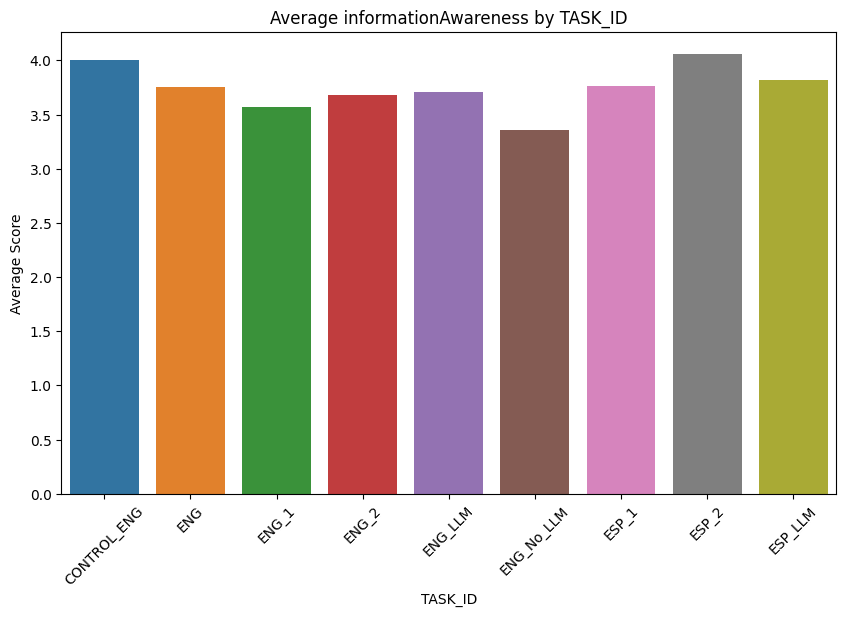

In [98]:
# Calculate the mean score for each category in 'Ownership' by TASK_ID
informationAwareness_cols = categories['informationAwareness']

# Group by 'TASK_ID' and calculate the mean of the ownership columns
grouped_df_cat = final_survey_df[informationAwareness_cols + ['task_id']].groupby('task_id').mean().reset_index()

# Plot the results for the 'Ownership' category


# Calculate the mean score for the 'Ownership' category by TASK_ID
category_mean = grouped_df_cat[informationAwareness_cols].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df_cat['task_id'], y=category_mean, errorbar=None)
plt.title('Average informationAwareness by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()

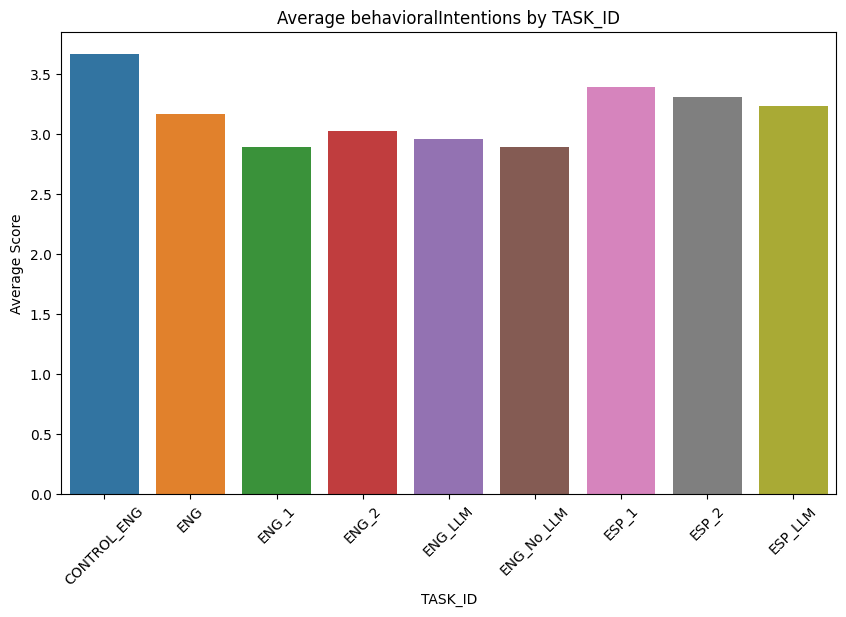

In [99]:
# Calculate the mean score for each category in 'Ownership' by TASK_ID
behavioralIntentions_cols = categories['behavioralIntentions']

# Group by 'TASK_ID' and calculate the mean of the ownership columns
grouped_df_cat = final_survey_df[behavioralIntentions_cols + ['task_id']].groupby('task_id').mean().reset_index()

# Plot the results for the 'Ownership' category


# Calculate the mean score for the 'Ownership' category by TASK_ID
category_mean = grouped_df_cat[behavioralIntentions_cols].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df_cat['task_id'], y=category_mean, errorbar=None)
plt.title('Average behavioralIntentions by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()

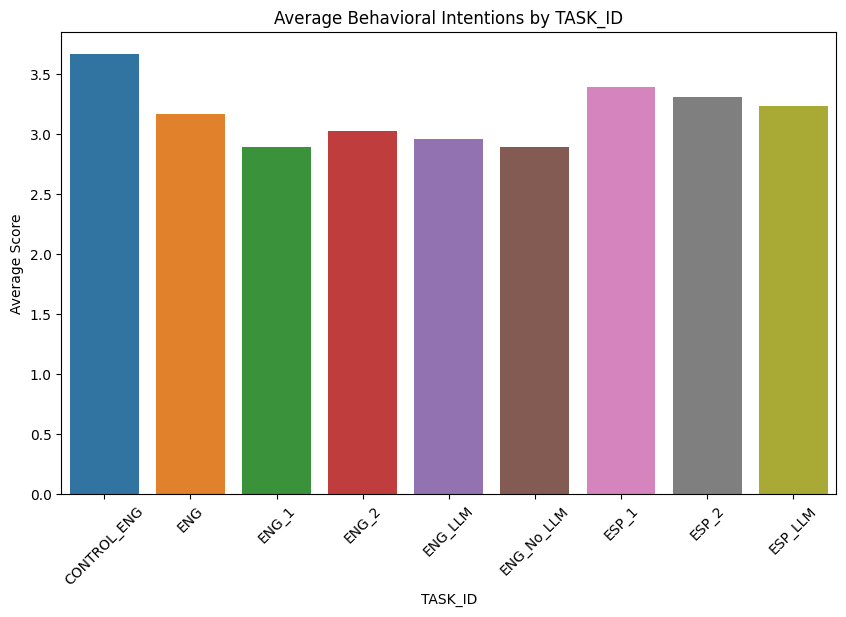

In [105]:
# Assuming final_survey_df is the original DataFrame
behavioralIntentions_cols = categories['behavioralIntentions']

# Group by 'task_id' and calculate the mean of the behavioralIntentions columns
grouped_df_cat = final_survey_df[behavioralIntentions_cols + ['task_id']].groupby('task_id').mean().reset_index()

# Calculate the mean score for the 'behavioralIntentions' category by TASK_ID
grouped_df_cat['behavioralIntentions_mean'] = grouped_df_cat[behavioralIntentions_cols].mean(axis=1)

# Plot the results for the 'behavioralIntentions' category
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df_cat['task_id'], y=grouped_df_cat['behavioralIntentions_mean'], errorbar=None)
plt.title('Average Behavioral Intentions by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()


In [82]:
final_survey_df.head(1)

,PROLIFIC_PID,document_id,task_id,task_category,donation_data,attentionCheck,charityFeedbackPositive,charityFeedbackNegative,adSource,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
7,66b66b2ef7f71d99c4688115,66c62a7e07bfd712ba6185d5,ESP_2,ESP,1.5,Cruz Roja,Lo que me gusto fue la ultimas palabras que di...,creo que todo me gusto no hubo nada desagradable,AS1,Algunas palabras aqui son muy profesionales po...,"[RU2, RU3, RU5, RU6]",5,4,4,5,4,4,5,5


In [83]:
final_survey_df['attentionCheck'].value_counts()

attentionCheck
Doctors Without Borders    4
UNICEF                     3
Red Cross                  3
Cruz Roja                  2
Médicos Sin Fronteras      1
Name: count, dtype: int64

In [103]:
final_survey_df.shape

(413, 19)

In [102]:
grouped_df_cat

,task_id,donation_data
0,CONTROL_ENG,1.166667
1,ENG,0.744828
2,ENG_1,0.756667
3,ENG_2,0.736066
4,ENG_LLM,0.643182
5,ENG_No_LLM,0.678846
6,ESP_1,0.819565
7,ESP_2,0.777273
8,ESP_LLM,0.646667


In [104]:
final_survey_df['task_id'].value_counts()

task_id
ENG_2          61
ENG_1          60
ENG            58
ENG_No_LLM     52
ESP_1          46
ESP_LLM        45
ESP_2          44
ENG_LLM        44
CONTROL_ENG     3
Name: count, dtype: int64

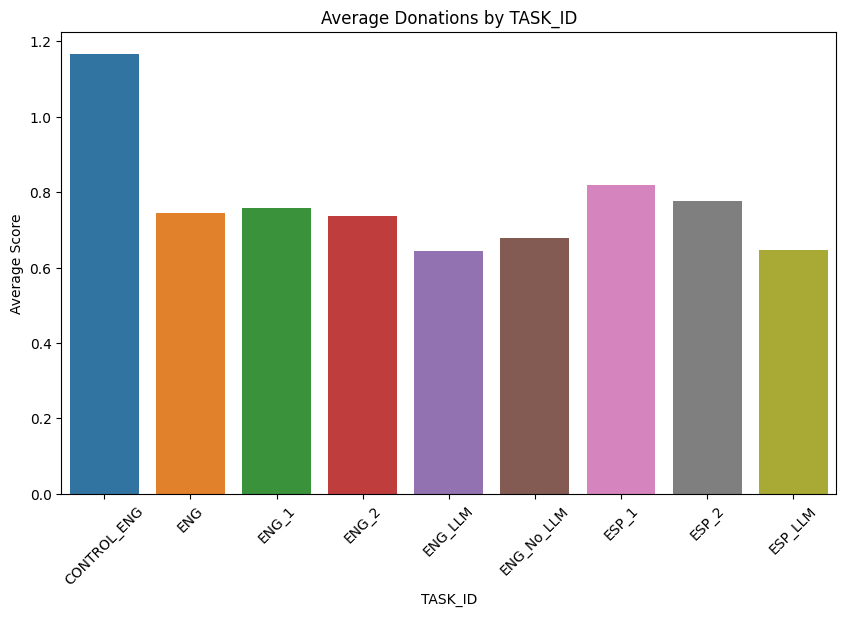

In [128]:

# Plot the results for the 'Ownership' category
final_survey_df['donation_data'] = final_survey_df['donation_data'].astype(float)
grouped_df_cat = final_survey_df[['donation_data','task_id']].groupby('task_id').mean().reset_index()

# Calculate the mean score for the 'Ownership' category by TASK_ID
# category_mean = grouped_df_cat[behavioralIntentions_cols].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df_cat['task_id'], y=grouped_df_cat['donation_data'], errorbar=None)
plt.title('Average Donations by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()

In [132]:
final_survey_df

,PROLIFIC_PID,document_id,task_id,task_category,donation_data,attentionCheck,charityFeedbackPositive,charityFeedbackNegative,adSource,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
0,607778a26ff3de83125f50c5,66c5a13c86c57a87db6f59d9,ENG,ENG,0.0,WWF,NA,NA,AS1,It seems generic.,[RU2],1,1,1,4,3,3,2,2
1,548491acfdf99b0379939cc0,66c5a13c86c57a87db6f59d9,ENG,ENG,0.0,WWF,It gave information on what the organization h...,NA,AS1,The use of exclamation points and generic writ...,"[RU1, RU3, RU5, RU6]",4,5,4,4,5,5,4,3
2,62d38f10654f3fc8a393b551,66c5a13c86c57a87db6f59d9,ENG,ENG,0.0,WWF,NA,They didn't say how much of my donation would ...,AS1,It sounded very cut and dry. Basic,[RU7],3,3,3,4,4,4,1,1
3,5e120ac3ac9e168a3f6ded71,66c5a13c86c57a87db6f59d9,ENG,ENG,1.0,WWF,The fact that a donation has an impact.,NA,AS2,It sounds like a human wrote it with passion.,"[RU3, RU6]",4,4,4,4,4,4,4,3
4,66a52bb0e95dee7a728e1892,66c62a7e07bfd712ba6185d5,ESP_2,ESP,1.0,WWF,Me gustó que se está enfocando en todo el grup...,NA,AS1,Nada en particular es como lo siento cuando lo...,[RU7],4,4,4,4,4,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,666b3c8c54ce3b910754cb8d,66d3c3775a434c9ed85a683a,ESP_1,ESP,0.5,WWF,Informativo y motivador,Unos errores ortograficos,AS2,Por los errores ortograficos \n,"[RU1, RU3, RU6]",4,4,4,4,4,4,5,4
422,65330c348f7089b3bd87236b,66d3c3775a434c9ed85a683a,ESP_1,ESP,0.0,WWF,NA,NA,AS1,no te da mucho informacion de la causa,[RU5],2,3,2,4,2,2,2,2
423,6654d2a81ff59c89050c1b01,95334737950147229a304e3d_LLM,ESP_LLM,ESP,0.7,WWF,Pueden agregar los años que tienen ayudando la...,NA,AS1,El mensaje proyecta empatía y llamado a la acc...,"[RU1, RU5, RU3]",4,4,5,4,5,4,4,4
424,6560b73479ea077341c338a6,95334737950147229a304e3d_LLM,ESP_LLM,ESP,1.3,WWF,NA,NA,AS2,Por la manera en la que la information esta es...,"[RU6, RU5]",4,4,4,4,4,4,4,3


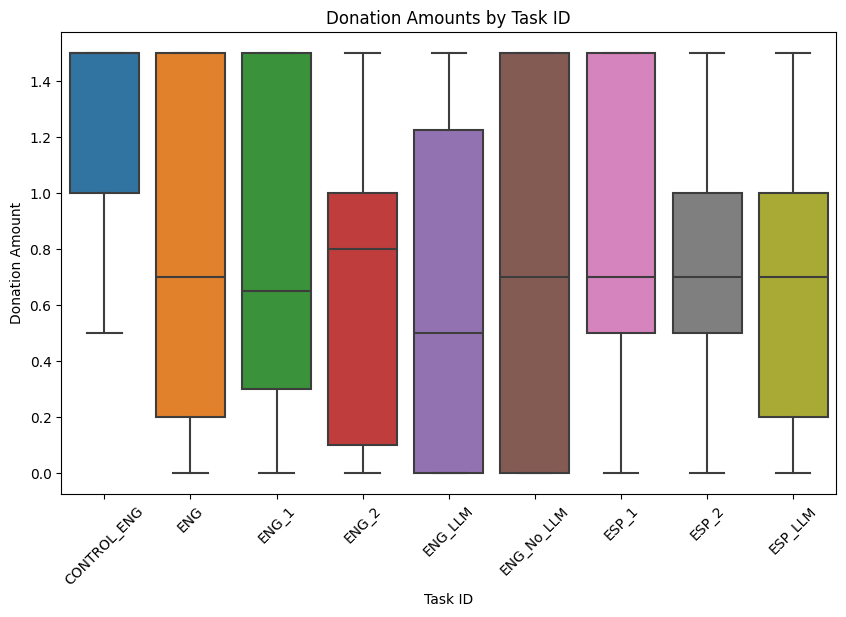

In [134]:
# Step 1: Exploratory Data Analysis (boxplot to visualize the distribution)
plt.figure(figsize=(10, 6))
sns.boxplot(x='task_id', y='donation_data', data=final_survey_df.sort_values(by='task_id'))
plt.title('Donation Amounts by Task ID')
plt.xlabel('Task ID')
plt.ylabel('Donation Amount')
plt.xticks(rotation=45)
plt.show()

# Step 2: Perform ANOVA


In [135]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

ANOVA result: F_onewayResult(statistic=0.754806229498328, pvalue=0.6429607057302704)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj   lower  upper  reject
------------------------------------------------------------
CONTROL_ENG        ENG  -0.4218 0.9373 -1.4514 0.6077  False
CONTROL_ENG      ENG_1    -0.41 0.9464 -1.4387 0.6187  False
CONTROL_ENG      ENG_2  -0.4306 0.9293 -1.4589 0.5977  False
CONTROL_ENG    ENG_LLM  -0.5235 0.8188 -1.5611 0.5141  False
CONTROL_ENG ENG_No_LLM  -0.4878 0.8673 -1.5203 0.5447  False
CONTROL_ENG      ESP_1  -0.3471 0.9812 -1.3833 0.6891  False
CONTROL_ENG      ESP_2  -0.3894 0.9622  -1.427 0.6482  False
CONTROL_ENG    ESP_LLM    -0.52 0.8237 -1.5569 0.5169  False
        ENG      ENG_1   0.0118    1.0 -0.3084  0.332  False
        ENG      ENG_2  -0.0088    1.0 -0.3277 0.3101  False
        ENG    ENG_LLM  -0.1016 0.9922 -0.4493  0.246  False
        ENG ENG_No_LLM   -0.066 0.9995 -0.3981 0.2661  False


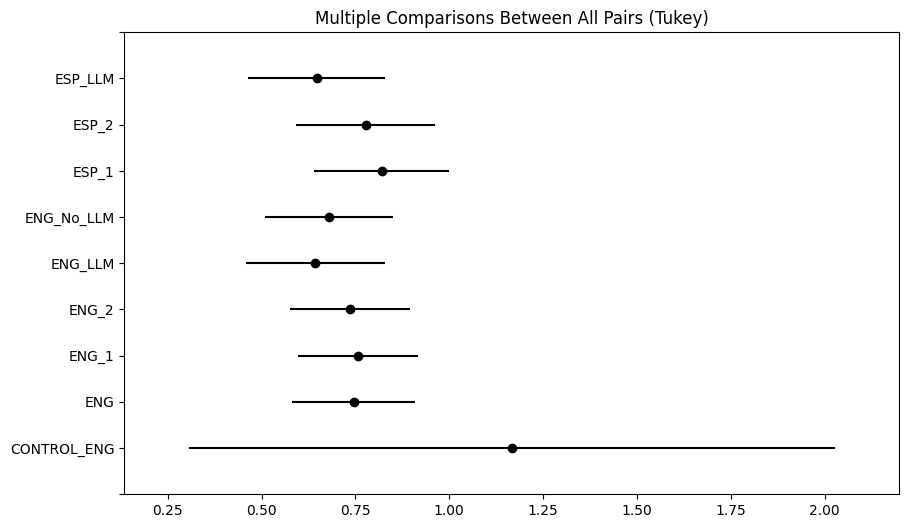

In [139]:
anova_results = stats.f_oneway(
    final_survey_df[final_survey_df['task_id'] == 'CONTROL_ENG']['donation_data'],
    final_survey_df[final_survey_df['task_id'] == 'ENG']['donation_data'],
    final_survey_df[final_survey_df['task_id'] == 'ENG_1']['donation_data'],
    final_survey_df[final_survey_df['task_id'] == 'ENG_2']['donation_data'],
    final_survey_df[final_survey_df['task_id'] == 'ENG_LLM']['donation_data'],
    final_survey_df[final_survey_df['task_id'] == 'ENG_No_LLM']['donation_data'],
    final_survey_df[final_survey_df['task_id'] == 'ESP_1']['donation_data'],
    final_survey_df[final_survey_df['task_id'] == 'ESP_2']['donation_data'],
    final_survey_df[final_survey_df['task_id'] == 'ESP_LLM']['donation_data']
)

print('ANOVA result:', anova_results)

# Step 3: If ANOVA is significant, run Tukey's HSD for post-hoc pairwise comparisons
tukey = pairwise_tukeyhsd(endog=final_survey_df['donation_data'], groups=final_survey_df['task_id'], alpha=0.05)
print(tukey)

# Step 4: Plot Tukey's HSD results
tukey.plot_simultaneous()
plt.show()

In [ ]:
anova_results = stats.f_oneway(
    df[df['task_id'] == 'CONTROL_ENG']['donation_amount'],
    df[df['task_id'] == 'ENG']['donation_amount'],
    df[df['task_id'] == 'ENG_1']['donation_amount'],
    df[df['task_id'] == 'ENG_2']['donation_amount'],
    df[df['task_id'] == 'ENG_LLM']['donation_amount'],
    df[df['task_id'] == 'ENG_No_LLM']['donation_amount'],
    df[df['task_id'] == 'ESP_1']['donation_amount'],
    df[df['task_id'] == 'ESP_2']['donation_amount'],
    df[df['task_id'] == 'ESP_LLM']['donation_amount']
)

print('ANOVA result:', anova_results)

# Step 3: If ANOVA is significant, run Tukey's HSD for post-hoc pairwise comparisons
tukey = pairwise_tukeyhsd(endog=df['donation_amount'], groups=df['task_id'], alpha=0.05)
print(tukey)

# Step 4: Plot Tukey's HSD results
tukey.plot_simultaneous()
plt.show()

In [106]:
final_survey_df.head(1)

,PROLIFIC_PID,document_id,task_id,task_category,donation_data,attentionCheck,charityFeedbackPositive,charityFeedbackNegative,adSource,adSourceReason,recipeUsed,EA1,EA2,EA3,IA1,IA2,IA3,BI1,BI2
0,607778a26ff3de83125f50c5,66c5a13c86c57a87db6f59d9,ENG,ENG,0.0,WWF,NA,NA,AS1,It seems generic.,[RU2],1,1,1,4,3,3,2,2


In [111]:
adsource = final_survey_df.groupby(['task_id'])['adSource'].value_counts().reset_index()

adsource_config = {
    "AS1": "AI",
    "AS2": "Human",
}
adsource['adSource']= adsource['adSource'].map(lambda x: adsource_config.get(x))

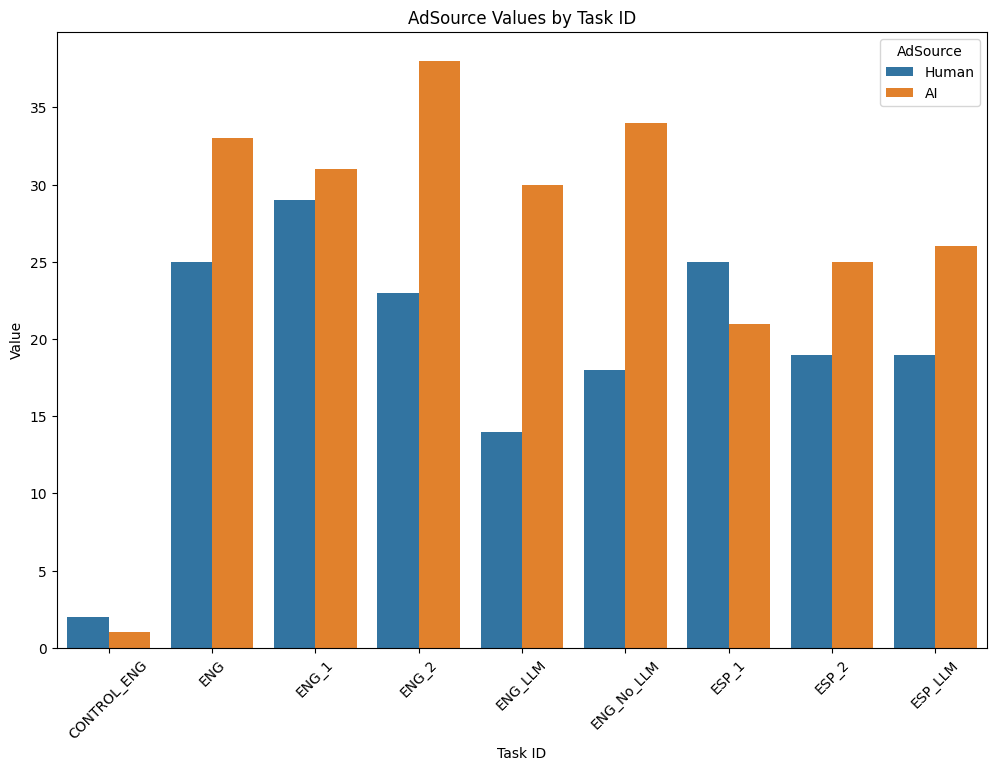

In [112]:
plt.figure(figsize=(12, 8))
sns.barplot(x='task_id', y='count', hue='adSource', data=adsource)

# Customize the plot
plt.title('AdSource Values by Task ID')
plt.ylabel('Value')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.legend(title='AdSource')

# Show the plot
plt.show()

In [114]:
final_survey_df['charityFeedbackPositive'].tolist()

['NA',
 'It gave information on what the organization has accomplished, along with benefits you would get from being a member. ',
 'NA',
 'The fact that a donation has an impact.',
 'Me gustó que se está enfocando en todo el grupo naturaleza, los animales y los humanos',
 'More information included about the work WWF does',
 'Me gustó como se especificaron las acciones a tomar para beneficial al planeta, en lugar de conceptos abstractos.',
 'NA',
 'n/a',
 'NA',
 'NA',
 'NA',
 'Me gusto saber cuanto crecimiento forastal han podido realizar gracias al trabajo del WWF.',
 'I like how they put how long WWF has been working on this cause and provided examples.',
 'the description of different natural places and animals',
 'Saving the animals',
 'I like the language used in the ad. For instance, I particularly liked "from protecting majestic elephants\nin Africa to safeguarding the delicate coral reefs of the Caribbean." It made an impressionable impact on my decision. As an animal lover, I 

In [126]:
charityFeedbackPositive = final_survey_df[final_survey_df['charityFeedbackPositive']!='NA'].groupby('task_id')['charityFeedbackPositive'].unique().reset_index()
charityFeedbackNegative = final_survey_df[final_survey_df['charityFeedbackNegative']!='NA'].groupby('task_id')['charityFeedbackNegative'].unique().reset_index()

charityFeedback = charityFeedbackPositive.merge(charityFeedbackNegative,on='task_id', how='inner')

In [127]:
charityFeedback.to_csv('../output/donationFeedback.csv', index=False)

In [120]:
final_survey_df[final_survey_df['charityFeedbackNegative']!='NA'].groupby('task_id')['charityFeedbackNegative'].unique()

task_id
CONTROL_ENG    [I thought it was a little too wordy and lacki...
ENG            [They didn't say how much of my donation would...
ENG_1          [N/A, The ad needs to explain exactly how they...
ENG_2          [I did not like that it felt to be pressuring ...
ENG_LLM        [It's way too wordy. Way too much text to keep...
ENG_No_LLM     [na, It doesn't really explain what WWF is or ...
ESP_1          [n/a, na, solamente que se enfocaran en lo bie...
ESP_2          [La frase inicial que desea un futuro donde "t...
ESP_LLM        [Demasiado entusiasmo , Lo que no me gustó fue...
Name: charityFeedbackNegative, dtype: object

In [115]:
final_survey_df['charityFeedbackNegative'].tolist()

['NA',
 'NA',
 "They didn't say how much of my donation would be used, or where exactly my money would go.",
 'NA',
 'NA',
 'NA',
 'La frase inicial que desea un futuro donde "toda la vida en la Tierra pueda vivir armoniosamente con los seres humanos" es ingenua, porque la mera existencia de una sociedad humana implica un desequilibrio con la flora y fauna que originalmente vive en cualquier región que los humanos se establecen.',
 'NA',
 'n/a',
 'NA',
 'NA',
 'NA',
 'Me gustaria saber un poco mas de cuales planes tienen, y en que otras maneras han podido ayudar al ambiente y en particular a los animales que protegen con el fondo.',
 'NA',
 'NA',
 'NA',
 'I did not like how the ad is being shown. The font and formatting is off putting.',
 'NA',
 'NA',
 'NA',
 'na',
 'NA',
 "I wish it went into more detail about what exactly the donations go towards. Yeah, you're preserving nature but... how? ",
 'Na',
 'NA',
 "It didn't show me why my small amount mattered.",
 'NA',
 'I dont like all t